<a href="https://colab.research.google.com/github/linyuehzzz/5526_neural_networks/blob/master/linear_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lab 3**
This code trains an linear SVM to determine if a genomic sequence is an ncRNA..  
Yue Lin (lin.3326 at osu.edu)  
Created: 11/2/2020

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Set up libraries**

In [2]:
!pip install libsvm

     |████████████████████████████████| 174kB 2.9MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233323 sha256=d3cf94793c0a52b1276ba83e643ba26030c97fbe42440f6b2f5fcc9169f3888c
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [169]:
from libsvm.svmutil import *
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt

#### **Read training and test data**

In [4]:
def get_data(filename):
    data = load_svmlight_file(filename)
    return data

#### **Classification using linear SVMs**

In [5]:
def linear_svm(train_data, c, test_data):
  # Get data
  train_x = train_data[0]
  train_y = train_data[1]
  test_x = test_data[0]
  test_y = test_data[1]

  # Train svm
  prob = svm_problem(train_y, train_x)
  param_str = '-t 0 -c 2e' + str(c)
  print("Param: " + param_str)
  param = svm_parameter(param_str)
  m = svm_train(prob, param)

  # Test
  p_label, p_acc, p_val = svm_predict(test_y, test_x, m)
  return p_acc

#### **Wrapper**

Read training and test data

In [7]:
%cd "/content/gdrive/My Drive/Colab Notebooks/cse5526"

# Read training and test data
train_file = "ncRNA_s.train.txt"
test_file = "ncRNA_s.test.txt"

train_data = get_data(train_file)
test_data = get_data(train_file)

/content/gdrive/My Drive/Colab Notebooks/cse5526


Classification using linear SVMs

In [ ]:
acc = []
for c in range(-4, 9):
  p_acc = linear_svm(train_data, c, test_data)
  acc.append(p_acc[0])

Param: -t 0 -c 2e-4
Accuracy = 67.8% (1356/2000) (classification)
Param: -t 0 -c 2e-3
Accuracy = 67.8% (1356/2000) (classification)
Param: -t 0 -c 2e-2
Accuracy = 67.8% (1356/2000) (classification)
Param: -t 0 -c 2e-1
Accuracy = 67.8% (1356/2000) (classification)
Param: -t 0 -c 2e0
Accuracy = 95.3% (1906/2000) (classification)
Param: -t 0 -c 2e1
Accuracy = 95.15% (1903/2000) (classification)
Param: -t 0 -c 2e2
Accuracy = 95.2% (1904/2000) (classification)
Param: -t 0 -c 2e3
Accuracy = 95.25% (1905/2000) (classification)
Param: -t 0 -c 2e4
Accuracy = 95.25% (1905/2000) (classification)
Param: -t 0 -c 2e5
Accuracy = 95.4% (1908/2000) (classification)
Param: -t 0 -c 2e6
Accuracy = 90.5% (1810/2000) (classification)
Param: -t 0 -c 2e7
Accuracy = 90.95% (1819/2000) (classification)
Param: -t 0 -c 2e8
Accuracy = 93.55% (1871/2000) (classification)


Plot prediction accuracy using linear SVMs

Text(0, 0.5, 'Accuracy')

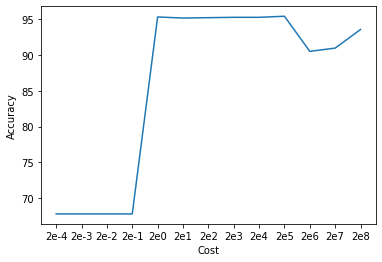

In [ ]:
cost = ['2e-4', '2e-3', '2e-2', '2e-1', '2e0', '2e1', '2e2', '2e3', '2e4', '2e5', '2e6', '2e7', '2e8']
plt.plot(cost, acc)
plt.xlabel('Cost')
plt.ylabel('Accuracy')